In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [116]:
def draw_line(coef, intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    # print('in function')
    # print('Coef: {}'.format(coef))
    # print('Intercept: {}'.format(intercept))
    # print('Min: {}'.format(mi))
    # print('Max: {}'.format(ma))
    p1 = [((-coef[1]*mi - intercept)/coef[0]), mi]
    p2 = [((-coef[1]*ma - intercept)/coef[0]), ma]
    points=np.array([p1,p2])
    print('Hyperplane Points: {}, {}'.format(p1, p2))
    plt.plot(points[:,0],points[:,1],c='cyan',label="Plane")

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

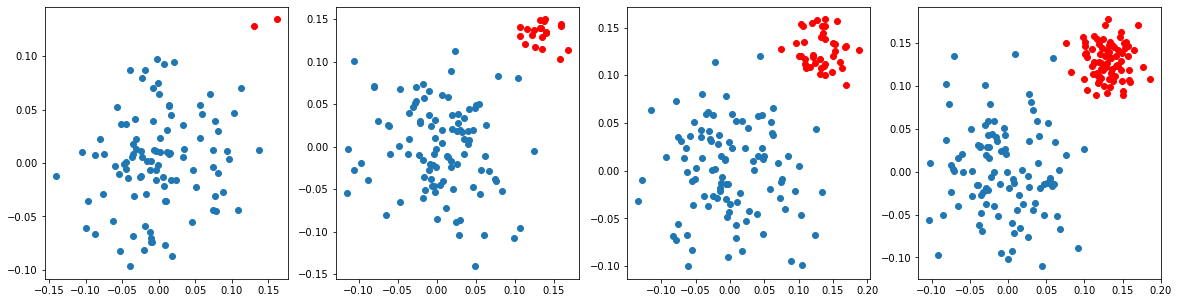

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
d={}
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    df=np.hstack((X,y))
    d["Dataset {0}".format(j)] = df
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

In [4]:
data0=pd.DataFrame(d['Dataset 0'],columns=['x1','x2','Y'])
data1=pd.DataFrame(d['Dataset 1'],columns=['x1','x2','Y'])
data2=pd.DataFrame(d['Dataset 2'],columns=['x1','x2','Y'])
data3=pd.DataFrame(d['Dataset 3'],columns=['x1','x2','Y'])


> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

In [5]:
data0.loc[:,['x1','x2']]

,x1,x2
0,-0.001481,-0.001739
1,0.010803,0.010358
2,0.017349,0.045053
3,-0.045107,-0.005278
4,0.008690,-0.035591
...,...,...
97,-0.062395,-0.054672
98,-0.053681,-0.081892
99,-0.011700,-0.006056
100,0.130431,0.128295


In [6]:
set_color = lambda x: 'yellow' if x==0 else 'blue'

Plane 1
Hyperplane Points: [132911.27072219644, 0.0], [132909.33709982684, 1.0]
Hyperplane Points: [13.49029235553764, 0.0], [11.556669985907224, 1.0]
Hyperplane Points: [0.3096499279846902, 0.0], [-1.4430770220440443, 1.0]
Hyperplane Points: [0.45117228286790695, 0.0], [-2.8726937297334922, 1.0]
Hyperplane Points: [5563.6337313984795, 0.0], [5562.660238668981, 1.0]
Hyperplane Points: [0.6018070342269641, 0.0], [-0.3413549440645738, 1.0]
Hyperplane Points: [0.18846520092552027, 0.0], [-0.8757733139172756, 1.0]
Hyperplane Points: [0.3302596233088007, 0.0], [-1.9050121143391645, 1.0]
Hyperplane Points: [2791.686712118689, 0.0], [2790.5775032853194, 1.0]
Hyperplane Points: [0.29966520626014637, 0.0], [-0.8095436271092037, 1.0]
Hyperplane Points: [0.18711879757544936, 0.0], [-1.0729953536481742, 1.0]
Hyperplane Points: [0.22867792130401915, 0.0], [-1.2304886427612844, 1.0]
Hyperplane Points: [976.5837448463744, 0.0], [975.6822419340759, 1.0]
Hyperplane Points: [0.12427901965184268, 0.0], [

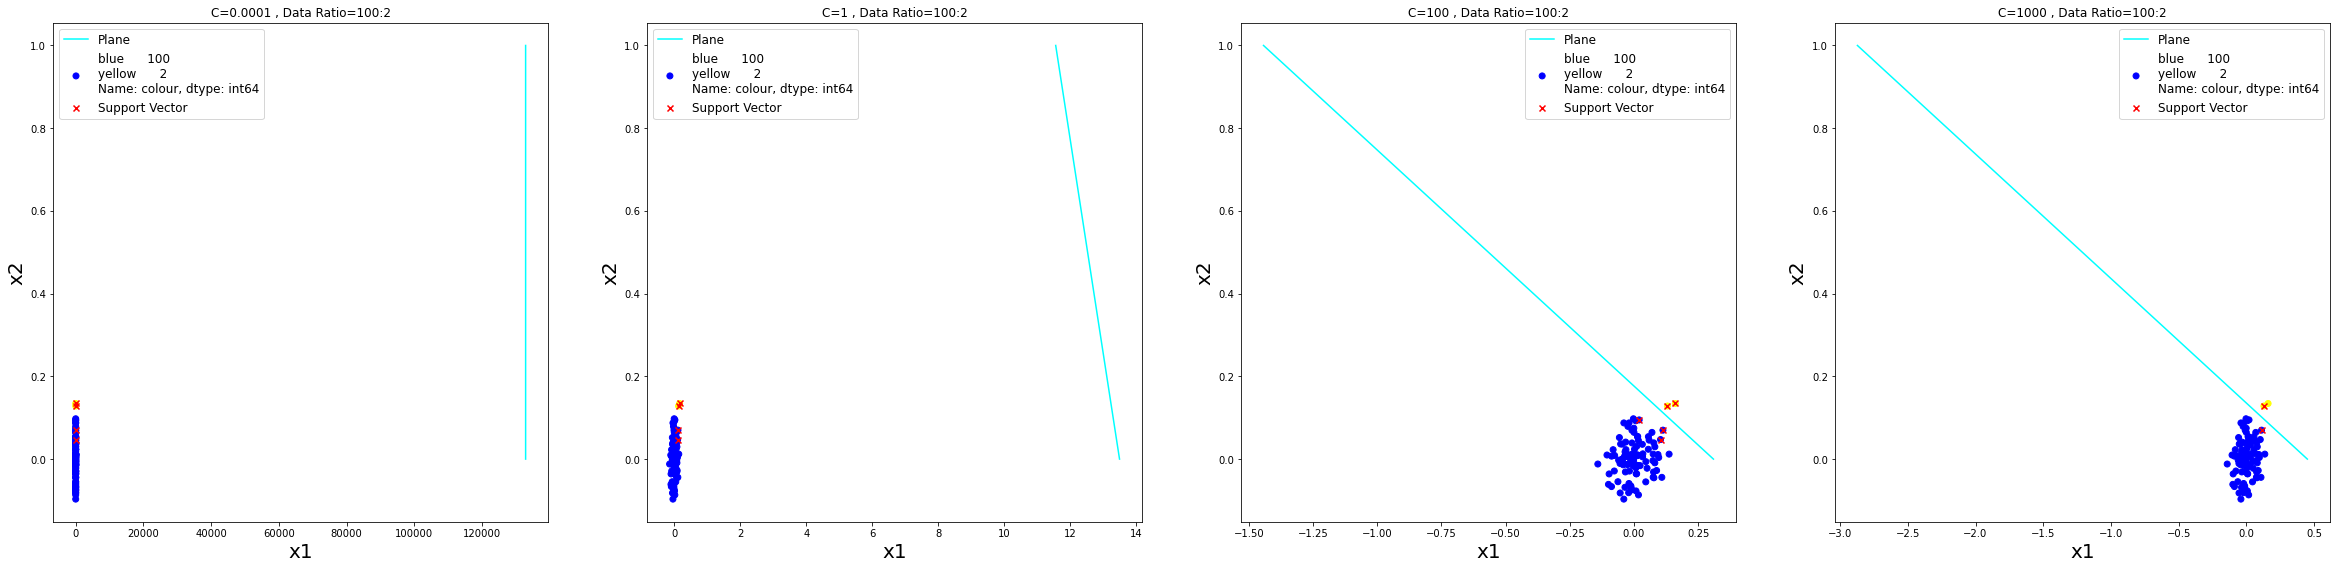

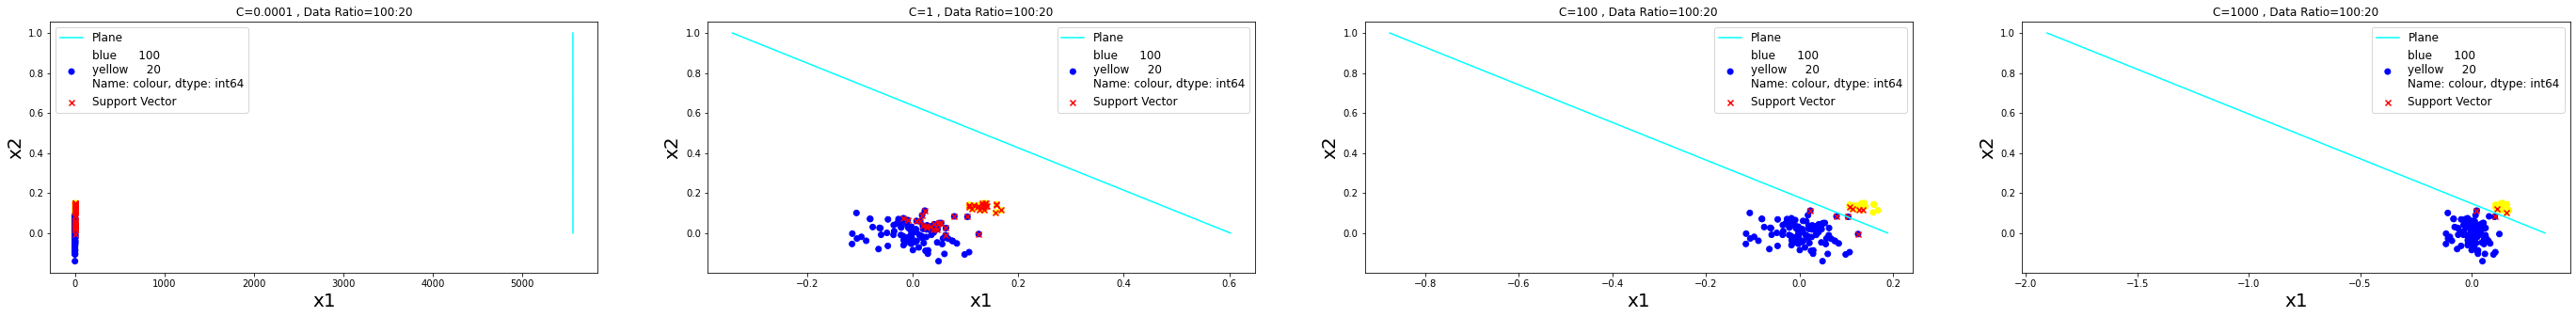

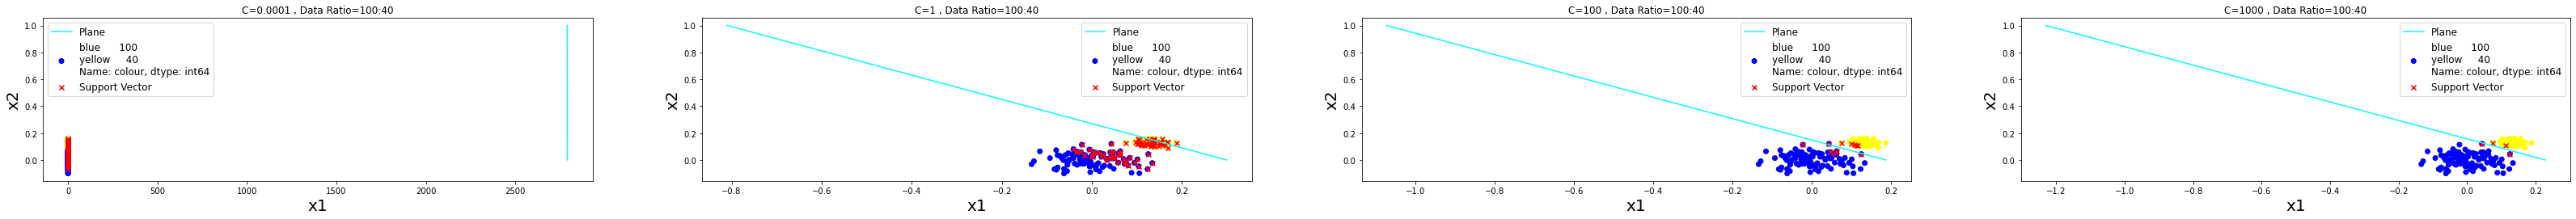

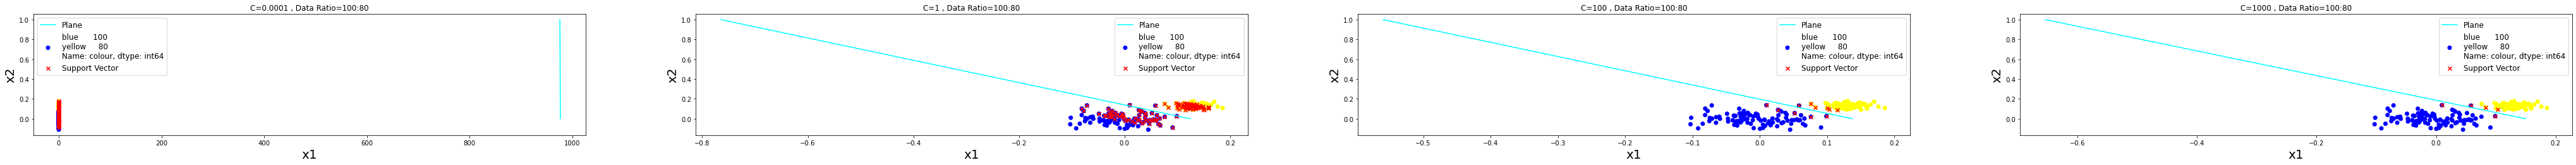

In [126]:
from sklearn.svm import SVC
list_df=[data0,data1,data2,data3]
C=[0.0001,1,100, 1000]
print('Plane 1')
for id,d in enumerate(list_df):
    fig = plt.figure(figsize=(len(d)*0.4,len(d)*0.09))
  
    for idx,i in enumerate(C):
        clf=SVC(kernel='linear',C=i)
        plane=clf.fit(d.loc[:,['x1','x2']], d.loc[:,['Y']])
        mi=min(d['Y'])
        ma=max(d['Y'])
        coef=plane.coef_[0]
        intercept=plane.intercept_[0]
        vectors=plane.support_vectors_
        fig.add_subplot(id+1,4,idx+1)
        draw_line(coef, intercept, mi, ma)
        d['colour'] = d['Y'].apply(set_color)
        plt.scatter(d['x1'],d['x2'],color=d["colour"],label=d["colour"].value_counts())
        plt.scatter(vectors[:,0],vectors[:,1],color='red', marker='x',label="Support Vector")
        plt.xlabel('x1',fontsize=20)
        plt.ylabel('x2',fontsize=20)
        plt.title("C={} , Data Ratio={}:{}".format(i,d["Y"].value_counts()[1],d["Y"].value_counts()[0]))
        plt.legend(fontsize=12)


## Observations
<br><b>After applying the SVM on imbalanced data with different ratios and for different values of hyperparameter C it was observed that:</b></br>
<br>1)When the value of hyperparameter C=0.001 the smallest in the input range then our Support vectors were very high for highly imbalanced data and our positive class from negative class is not seperated which tells us that the model is underfit.</br>
<br>2)When the value of hyperparameter C=1 then we can see that our model is able to seperate data partially but not completely and the support vectors were also high in this case but our line shows that the data is somewhat seperated.</br>
<br>3)When the value of hyperparameter C=100 then our model is performing good in terms of seperating the classes and the number of support vectors is decreased significantly and the line is seperating the data points efficiently</br>
<br>4)When the value of hyperparameter C=1000 the the number of support vectors is decreased a lot and also the line plotted using coefficients and interceps shows that our model is doing a perfect job in seperating the points and when there is perfect classification then our model becomes overfit.</br>

<br><b>So as a conclusion we can say that as the value of C increases then our model moves towards overfitting and as the value of C decreases then our model moves towards underfitting so we have to find a balance between these 2 and this also explains the Bias-Variance Tradeoff for SVM's.</b></br>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [9]:
#you can start writing code here.

Plane 1
Hyperplane Points: [136767.62235499086, 0.0], [136766.73301214183, 1.0]
Hyperplane Points: [13.787822705266429, 0.0], [12.897141590316625, 1.0]
Hyperplane Points: [0.3369970004170303, 0.0], [-0.6600628255035008, 1.0]
Hyperplane Points: [0.2624359005301872, 0.0], [-0.9554241973179021, 1.0]
Hyperplane Points: [7434.679184686484, 0.0], [7433.640126642662, 1.0]
Hyperplane Points: [0.886918987298631, 0.0], [-0.14755909310980542, 1.0]
Hyperplane Points: [0.1938350322907421, 0.0], [-0.8308527145049814, 1.0]
Hyperplane Points: [0.20192062833766766, 0.0], [-0.905051925633607, 1.0]
Hyperplane Points: [2414.09538038291, 0.0], [2413.1459703063715, 1.0]
Hyperplane Points: [0.3889621969405654, 0.0], [-0.5798278472239846, 1.0]
Hyperplane Points: [0.1795997373275129, 0.0], [-0.9453495470239922, 1.0]
Hyperplane Points: [0.18669683784622923, 0.0], [-0.9533743000381563, 1.0]
Hyperplane Points: [365.55212319458246, 0.0], [364.61836823393173, 1.0]
Hyperplane Points: [0.16460769959250177, 0.0], [-0.

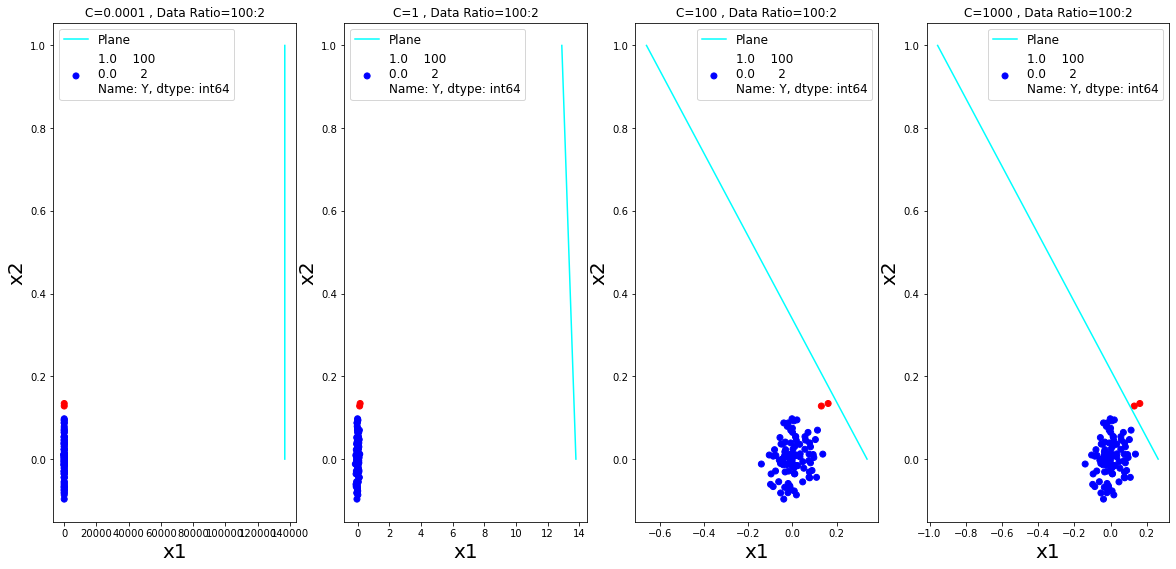

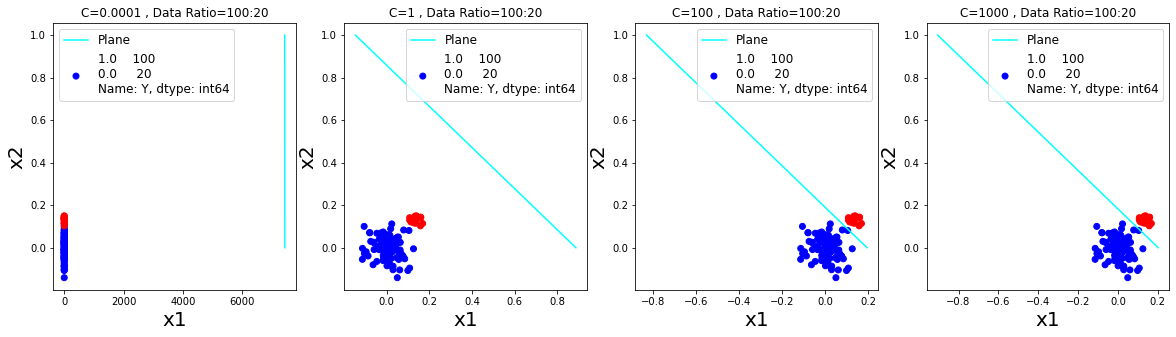

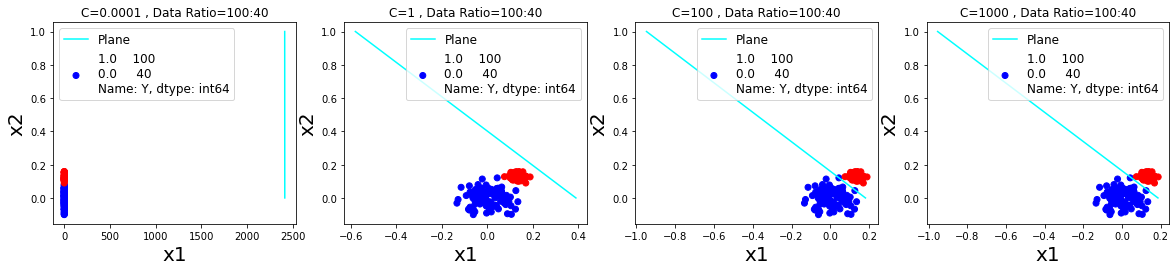

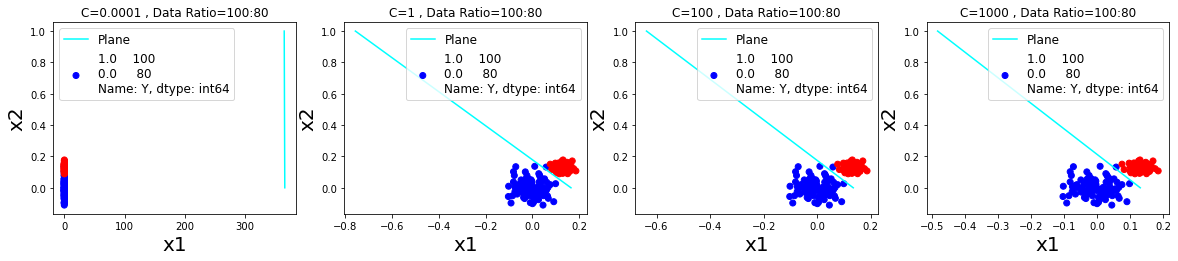

In [129]:
from sklearn.linear_model import LogisticRegression
set_color2 = lambda x: 'red' if x==0 else 'blue'
list_df2=[data0,data1,data2,data3]
C=[0.0001,1,100, 1000]
print('Plane 1')
for id,d in enumerate(list_df):
    fig = plt.figure(figsize=(20,len(d)*0.09))
    for idx,i in enumerate(C):
        clf=LogisticRegression(penalty='l2',C=i)
        plane=clf.fit(d.loc[:,['x1','x2']], d.loc[:,['Y']])
        mi=min(d['Y'])
        ma=max(d['Y'])
        coef=plane.coef_[0]
        intercept=plane.intercept_[0]
        fig.add_subplot(id+1,4,idx+1)
        draw_line(coef, intercept, mi, ma)
        d['colour'] = d['Y'].apply(set_color2)
        plt.scatter(d['x1'],d['x2'],c=d["colour"],label=d["Y"].value_counts())
        plt.xlabel('x1',fontsize=20)
        plt.ylabel('x2',fontsize=20)
        plt.title("C={} , Data Ratio={}:{}".format(i,d["Y"].value_counts()[1],d["Y"].value_counts()[0]))
        plt.legend(fontsize=12)

## Observations
<br><b>After applying the Logistic Regression on imbalanced data with different ratios and for different values of hyperparameter C it was observed that:</b></br>
<br>1)When the value of hyperparameter C=0.001 the smallest in the input range then our model was not able to seperate datapoints as the line plotted using coefficients and intercepts was not able to separate our data and is inclined towards majority class this shows that our model is underfit and majority class is dominating.</br>
<br>2)When the value of hyperparameter C=1 and the data becomes more balanced then our model was able to seperate datapoints partially as the line plotted using coefficients and intercepts was able to separate our data but for highly imbalanced dta our model fails to seperate here also and is inclined towards majority class.</br>
<br>3)When the value of hyperparameter C=100 and as the data becomes more balanced then our model is performing good in terms of seperating the classes  the line is seperating the data points efficiently but in case of highly imabalced data our model fails here also.</br>
<br>4)When the value of hyperparameter C=1000 as the data becomes more balanced  the line plotted using coefficients and intercepts shows that our model is doing a perfect job in seperating the points and when there is perfect classification then our model becomes overfit but in case of highly imbalaced data our model is able to seperate the classes now.</br>

<br><b>So as a conclusion we can say that as the value of C increases then our model moves towards overfitting and as the value of C decreases then our model moves towards underfitting so, we have to find a balance between these 2 and this also explains the Bias-Variance Tradeoff for Logistic Regression but in logistic regression we had learnt that λ was te hyperparameter and λ=1/C.</b></br>

<br><b>Also the data imbalance plays an important role in a model because if we have highly imbalanced data then we have to tune our model to the larger hyperparameter values and if we have balanced data then we can get more efficient model at lower hyperparameter values so it is always preferred to check whether the data is balanced or imbalanced and if it is imbalanced then we first need to balance it using techniques like undersampling,oversampling or by assigning class weights.</b></br>